<a href="https://colab.research.google.com/github/Shibu778/MyNotebooks/blob/master/Comparing_the_Roseinstein_and_the_amplification_factor_distribution_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import cKDTree as KDTree
from nolitsa.nolitsa import lyapunov, utils
from sklearn import linear_model

In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
# Utility Functions
def euclidean_distance(x,y):
  return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2+(x[2]-y[2])**2)

def magnitude_of_vector(x):
  return np.sqrt(x[0]**2+x[1]**2+x[2]**2)

def best_fit_slope(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs**2)))
    return m

def best_regr_slope(xs, ys):
  regr = linear_model.LinearRegression()
  regr.fit(xs, ys)
  return regr.coef_

In [ ]:
# Generating 3D Hennon map data
# 3D Hennon map in discrete form is given as follows
# x1+ = a - (x2)^2 - bx3
# x2+ = x1
# x3+ = x2
 
def henon_3d(a,b, n, x10, x20, x30):
  data = np.array([[x10,x20,x30]], dtype = float)
  for i in range(n):
    data1 = np.array([[a-data[i][1]**2-b*data[i][2],data[i][0],data[i][1]]],dtype = float)
    data = np.append(data, data1, axis = 0)
  return data

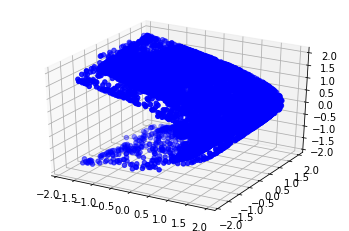

In [ ]:
# Creating and plotting a henon map of following parameter specification
# a = 1.76, b = 0.1, initial state = [0.3922, 0.6555, 0.1712], n = 1000
data = henon_3d(1.76, 0.1, 10000, 0.3922, 0.6555, 0.1712)  # Map with more chaos
x1 = data[:,0]
x2 = data[:,1]
x3 = data[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,x2,x3, zdir='z',  c='b', marker='o')

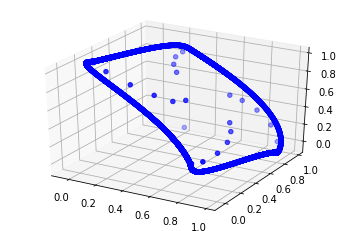

In [ ]:
# Creating and plotting a henon map of following parameter specification
# a = 1, b = 0.1, initial state = [0.3922, 0.6555, 0.1712], n = 1000
data1 = henon_3d(1, 0.1, 10000, 0.3922, 0.6555, 0.1712) # Map with less chaos
x1 = data1[:,0]
x2 = data1[:,1]
x3 = data1[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,x2,x3, zdir='z',  c='b', marker='o')

## Below characterization of chaos in henon 3d map is done in 2 ways. 
> Fist method - Using the distribution of amplification

  According to this method if the distribution amplification factor is Gaussian, then the system has chaos and if it is not gaussian then the system does not have chaos.

> Second method - Using the Rosenstein Algorithm ( Finding the Maximum lyapunov exponent)

  According to Rosenstein Algorithm if the value of Maximum lyapunov exponent is positive there is chaos in the system. If it is negative then the system does not have chaos. If the maximum lyapunov value of one system is greater than that of other system, then the system with high lyapunov exponent value has higher magnitude of chaos.

data = Chaotic data

data1 = Non chaotic data

Proposed idea = Can we quantify chaos from the area under the distribution of the amplification factor.



###Step 1 - First Method for more chaotic data

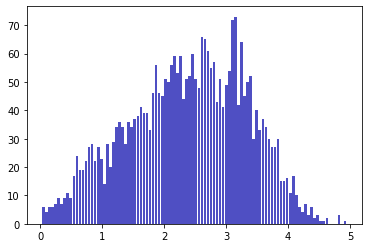

In [ ]:
# Find the nearest neighbor of all points in the dataset
tree = KDTree(data)
j = 1 # index of the point whose nearest neighbor is taken into study
for i in range(2, 23):
  dist, index = tree.query(data[j], k = i, p =2) # p=2 for euclidean distance

# So point with index 1 and 4477 can be taken as the two point in closest trajectories 
#(Considering the Theiler wondow; as 4477 is greater than the theiler window)
# Finding the amplification upto next 1000 points in each
A = np.array([],dtype = float)
d0 = dist[1]
A = np.append(A,d0)
for i in range(1,3000):
  d1 = np.asarray(euclidean_distance(data[j+i],data[index[1]+i]), dtype = float)
  A = np.append(A,d1)

# Plotting the histogram
n, bins, patches = plt.hist(x=A, bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [ ]:
n, bins

(array([ 6.,  4.,  6.,  6.,  7.,  9.,  7.,  9., 11.,  9., 17., 24., 19.,
        19., 22., 27., 28., 22., 27., 23., 14., 28., 20., 29., 34., 36.,
        34., 28., 36., 34., 37., 38., 41., 39., 39., 33., 46., 56., 46.,
        45., 51., 50., 56., 59., 53., 59., 44., 51., 52., 60., 51., 48.,
        66., 65., 61., 55., 57., 43., 51., 41., 49., 54., 72., 73., 42.,
        64., 45., 50., 52., 30., 40., 33., 37., 34., 30., 27., 27., 30.,
        15., 15., 16., 11., 17., 10.,  6.,  4.,  7.,  3.,  6.,  2.,  3.,
         1.,  1.,  2.,  0.,  0.,  0.,  3.,  0.,  1.]),
 array([0.02411379, 0.07331125, 0.12250871, 0.17170617, 0.22090363,
        0.27010108, 0.31929854, 0.368496  , 0.41769346, 0.46689092,
        0.51608838, 0.56528584, 0.6144833 , 0.66368076, 0.71287821,
        0.76207567, 0.81127313, 0.86047059, 0.90966805, 0.95886551,
        1.00806297, 1.05726043, 1.10645789, 1.15565534, 1.2048528 ,
        1.25405026, 1.30324772, 1.35244518, 1.40164264, 1.4508401 ,
        1.50003756, 1.5492

In [ ]:
min(A), max(A)

(0.02411379040906237, 4.9438596758606295)

In [ ]:
area = sum(np.diff(bins)*n)
area

147.59237656354705

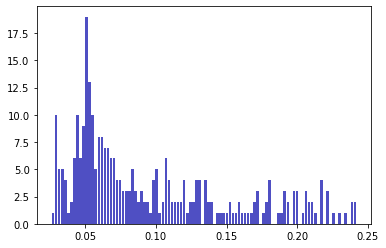

In [ ]:
# Non chaotic
# So all the axis values are between -2 to 2
# Now lets divide this space to 20 division in this range for each axis to form the hyper box of dimension(0.2, 0.2, 0.2)
# Maximum distance between two points in hyperbox is (3**0.33)*0.2 = 0.34641016151377546 = d
# So if the distance between two points is less than d, then the two points are in the same hyperbox
# Now lets make a KDTree
data1 = henon_3d(1, 0.1, 10000, 0.3922, 0.6555, 0.1712)
tree = KDTree(data1)
j = 1 # index of the point in data (query will search the neightbour of this point)

for i in range(2, 23):
  dist, index = tree.query(data1[j], k = i, p =2) # p=2 for euclidean distance

# So point with index 1 and 4477 can be taken as the two point in closest trajectories 
#(Considering the Theiler wondow; as 4477 is greater than the theiler window)
# Finding the amplification upto next 1000 points in each
A = np.array([],dtype = float)
d0 = dist[1]
A = np.append(A,d0)
for i in range(1,300):
  d1 = np.asarray(euclidean_distance(data1[j+i],data1[index[1]+i]), dtype = float)
  A = np.append(A,d1)

# Plotting the histogram
n, bins, patches = plt.hist(x=A, bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [ ]:
n, bins

(array([ 1., 10.,  5.,  5.,  4.,  1.,  2.,  6., 10.,  6.,  9., 19., 13.,
        10.,  5.,  8.,  8.,  7.,  7.,  6.,  6.,  4.,  4.,  3.,  3.,  3.,
         5.,  3.,  2.,  3.,  2.,  2.,  1.,  4.,  5.,  1.,  2.,  6.,  4.,
         2.,  2.,  2.,  2.,  4.,  1.,  2.,  2.,  4.,  4.,  0.,  4.,  2.,
         2.,  0.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,
         1.,  2.,  3.,  0.,  1.,  2.,  4.,  0.,  0.,  1.,  1.,  3.,  2.,
         0.,  3.,  3.,  0.,  1.,  3.,  2.,  2.,  1.,  0.,  4.,  0.,  3.,
         0.,  1.,  0.,  1.,  0.,  1.,  0.,  2.,  2.]),
 array([0.0262056 , 0.02836176, 0.03051791, 0.03267407, 0.03483022,
        0.03698638, 0.03914253, 0.04129868, 0.04345484, 0.04561099,
        0.04776715, 0.0499233 , 0.05207946, 0.05423561, 0.05639177,
        0.05854792, 0.06070408, 0.06286023, 0.06501638, 0.06717254,
        0.06932869, 0.07148485, 0.073641  , 0.07579716, 0.07795331,
        0.08010947, 0.08226562, 0.08442177, 0.08657793, 0.08873408,
        0.09089024, 0.0930

In [ ]:
max(A),min(A)

(0.24182105006544963, 0.026205603597292373)

In [ ]:
area1 = sum(np.diff(bins)*n)
area1

0.6468463394044717

In [ ]:
# Chaotic 3d henon - Finding the lyapunov exponent
le = lyapunov.mle(data) # Average divergence
le_real = best_fit_slope(np.arange(500)/500,le/max(le)) # Lyapunov exponent
le_real

0.8173057211269686

In [ ]:
# Non-chaotic 3d henon - Finding the lyapunov exponent
le1 = lyapunov.mle(data1) # Average divergence
le_real1 = best_fit_slope(np.arange(500)/500,le1/max(abs(le1))) # Lyapunov exponet
le_real1

0.0012647490298445334

#Rough


In [ ]:
for i in range(2, 23):
  dist, index = tree.query(data[j], k = i, p =2)

In [ ]:
np.log(np.e)

1.0

In [ ]:
from scipy.spatial import cKDTree as KDTree
tree = KDTree(data)
for i in range(5,6):
  dist, index = tree.query(data[1], k = i, p = 2)
  print(dist)
  print(index)

[0.         0.06199147 0.07600646 0.07733653 0.08507225]
[   1 4477 5173 9304 9430]


In [ ]:
dist[[False, False,False, False,True]]

array([0.08507225])

In [ ]:
x1 = utils.dist(data[1],data[4477],metric = 'euclidean')
def euclidean_distance(x,y):
  return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2+(x[2]-y[2])**2)

def magnitude_of_vector(x):
  return np.sqrt(x[0]**2+x[1]**2+x[2]**2)

euclidean_distance(data[1], data[4477]), magnitude_of_vector(x1)

In [ ]:
print(magnitude_of_vector(utils.dist(data[1],data[4477],metric = 'euclidean')), magnitude_of_vector(utils.dist(data[1],data[5173],metric = 'euclidean')),
magnitude_of_vector(utils.dist(data[1],data[9304],metric = 'euclidean')),magnitude_of_vector(utils.dist(data[1],data[3964],metric = 'euclidean')))

0.06199147343453826 0.07600646255688724 0.07733652551595037 0.12625497004792807


In [ ]:
indices,dists = utils.neighbors(data[:10])
indices, dists

(array([9, 0, 1, 7, 8, 9, 0, 3, 4, 5]),
 array([0.91570381, 0.92099975, 0.92099975, 0.74079022, 0.89089662,
        0.89089662, 0.95042329, 0.74079022, 0.89089662, 0.89089662]))

In [ ]:
len(indices), len(dists)

(10001, 10001)

# Experimenting With Rosenstein Agorithm
In the following cell we will analyze the working of rosenstein algorithm. Following are the steps that are followed.

## Step 1
Finding the information about nearest neighbor of all the points in the data. Our data has 10000 points and hence 10000 state. There should be 10000 information we should obtain. The information includes the index of the nearest neighbor and the distance between the point and its nearest neighbor.

In [ ]:
index, dist = utils.neighbors(data, metric = 'euclidean', window = 10)
index, dist

(array([ 984, 4477, 9305, ...,  575, 5020, 5983]),
 array([0.85513858, 0.06199147, 0.0352047 , ..., 0.06601776, 0.04300252,
        0.03150123]))

## Step 2
Find the length of the dataset. Find the maximum number of times the average divergence will be computed.

In [ ]:
m = len(data)
m

10001